## Умова лабораторної роботи

### Моделі

Алгоритм роздiлу сумiшi expectation-maximization (EM), GaussianMixture та BayesianGaussianMixture модулю `sklearn.mixture`

### Початкові дані

(а)
```python
sklearn.datasets.make_moons
```
(б)
``` python
import numpy as np
np.random.seed(0)
n_points_per_cluster = 10000
C1 = [-6, -2] + 0.7 * np.random.randn(n_points_per_cluster, 2)
C2 = [-2, 2] + 0.3 * np.random.randn(n_points_per_cluster, 2)
C3 = [1, -2] + 0.2 * np.random.randn(n_points_per_cluster, 2)
C4 = [4, -4] + 0.1 * np.random.randn(n_points_per_cluster, 2)
C5 = [5, 0] + 1.4 * np.random.randn(n_points_per_cluster, 2)
C6 = [5, 6] + 2.0 * np.random.randn(n_points_per_cluster, 2)
X = np.vstack((C1, C2, C3, C4, C5, C6))
```

### Завдання

1. Представити початковi данi графiчно.
2. Побудувати модель кластеризацiї згiдно з варiантом.
3. Виконати кластеризацiю даних на основi моделi.
4. Представити розбиття на кластери графiчно, наприклад, рiзними кольорами.
5. Розрахувати час кластеризацiї. Оцiнити швидкодiю методу на надвеликих наборах даних (наприклад, при збiльшеннi кiлькостi точок даних до ста тисяч i бiльше).
6. Побудувати кiлька альтернативних моделей:
    * задати рiзнi значення кiлькостi кластерiв, в алгоритмах де кiлькiсть кластерiв - параметр.
7. Для кожної альтернативної моделi розрахувати метрики якостi кластеризацiї, що реалiзованi в модулi `sklearn.metrics` (тiльки метрики згiдно з варiантом):
    * Homogeneity.
    * Completeness.
    * V-measure.
8. Виконати аналiз результатiв кластеризацiї одним з неформальних методiв (тiльки методом згiдно з варiантом):
    * чи є розбиття стабiльним на пiдвибiрках даних,
9. Вищенаведенi пункти виконати для заданих двох наборiв даних рiзної форми.
10. Зробити висновки про якiсть роботи моделей на дослiджених даних та про швидкодiю методу.
11. Оцiнити результати кластеризацiї на основi метрик якостi та на основi неформальних методiв. У кожному варiантi задано два набори даних. Спробувати пiдiбрати найкращу модель кластеризацiї для кожного набору даних.


## Метрики якості

$Y_{true}$ - істинні мітки.</br>
$Y_{pred}$ - спрогнозовані мітки.

Ентропія: $$H(A,S)=-\sum p_i\ln p_i,\ p_i=\dfrac{k_i}{|A|}.$$

### Homogeneity
Homogeneity (однорідність) - кожен кластер містить лише члени одного клас. Метрика обмежена обмежені нижче 0 і вище 1 (що вище, то краще).
$$homogeneity=1-\dfrac{H(Y_{true}|Y_{pred})}{H(Y_{true})}$$

### Completeness
Completeness (повнота) - усі члени даного класу призначаються до одного кластеру. Метрика обмежена обмежені нижче 0 і вище 1 (що вище, то краще)
$$ completeness=1-\dfrac{H(Y_{pred}|Y_{true})}{H(Y_{pred})}$$

$homogeneity(a, b) == completeness(b, a)$
### V-measure
V-measure - Середнє гармонічне метрик $homogeneity, completeness$.
$$v=\dfrac{(1+\beta) \cdot homogeneity\cdot completeness}{\beta\cdot  homogeneity+ completeness}$$

## Моделі

### Expectation-maximization

Алгоритм роздiлу сумiшi expectation-maximization (EM)-використовують тоді коли не вдається описати її сумішшю розподілів.

Дано:
1. Вибірка $X$ з $m$ випадкових і незалежних спостережень $x$.
2. $x$ із суміші $p(x)=\{p(j)|j=1,\ldots, k\}$.
3. $\varphi(x,\theta_j)$ - функція правдоподібності $j$-тої компоненти суміші.

Необхідно: Оцінити вектор параметрів $\Theta=(w_1,\ldots,w_k,\theta_1,\ldots,\theta_k)$

Алгоритм ЕМ:
1. Обчислити початкове наближення вектору параметрів.
2. Повторювати:
    1. Е-крок - розраховується очікуване значення вектору скритих змінних $Q$ на основі поточного наближення вектора параметрів $\Theta$.\
    $p_j(x)=\varphi(x,\theta_j)=p(x)p(\theta_j|x)=w_jp_j(x)$.\
    $q_{ij}=p(\theta_j|x)$- невідома апостеріорна імовірність того, що об’єкт $x_і$ отримано з $j$–ї компоненти суміші. $q_{ij}$ взята в якості скритих змінних\
    $p(j)=w_j$-апріорна імовірність $j$-ї компоненти суміші, ваговий коефіцієнт в сумі.
    \begin{equation*}
    \sum\limits_{j=1}^k q_{ij}=1,\ \forall i=1,\ldots,m,\ q_{ij}=\dfrac{w_jp_j(x_i)}{ \sum\limits_{s=1}^k w_sp_s(x_i)},\ \forall i,j.
    \end{equation*}
    2. M-крок - розв’язується задача максимізації правдоподібності і знаходиться наступне наближення вектору на основі поточних значень векторів $Q$ і $\Theta$:
    \begin{equation*}
    R(\Theta)=\ln \prod\limits_{i=1}^mp(x_i)=\sum\limits_{i=1}^m\ln\sum\limits_{j=1}^kw_jp_j(x_i)\rightarrow \max\limits_{\Theta}.
    \end{equation*}
    при обмеженні $\sum\limits_{j=1}^kw_j=1,\ w_j\geqslant0$. Розв'язок цієї задачі оптимізації: $w_j=\dfrac{1}{m}\sum\limits_{i=1}^mq_{ij},\ j=1,\ldots,k$.\
    Отримаємо $k$ незалежниї оптимізаційних задач:
    \begin{equation*}
    \theta_j=\arg\max\limits_{\Theta}\sum\limits_{i=1}^mq_{ij}\ln\varphi(x_i,\theta).
    \end{equation*}
3. Поки $Q$ і/або $\Theta$ не стабілізуються.

### GaussianMixture
GaussianMixture реалізує алгоритм (EM) для підгонки моделей суміші Гауса. Він також може малювати еліпсоїди довіри для багатовимірних моделей і обчислювати байєсівський інформаційний критерій для оцінки кількості кластерів у даних. Надається з різними параметрами для обмеження коваріації оцінених класів різниці: сферична, діагональна, пов’язана або повна коваріація.

Переваги:
1. Це найшвидший алгоритм для вивчення моделей суміші
2. Оскільки цей алгоритм максимізує лише ймовірність, він не буде зміщувати середні значення в бік нуля або зміщувати розміри кластерів, щоб мати конкретні структури, які можуть або не можуть застосовуватися.

Недоліки

1. Коли в одній суміші недостатньо багато точок, оцінка коваріаційних матриць стає важкою, і відомо, що алгоритм розходиться та знаходить рішення з нескінченною ймовірністю, якщо коваріації не регуляризуються штучно.
2. Цей алгоритм завжди використовуватиме всі компоненти, до яких він має доступ, потребуючи збережених даних або інформаційних теоретичних критеріїв, щоб вирішити, скільки компонентів використовувати за відсутності зовнішніх сигналів.

### BayesianGaussianMixture
API подібний до того, що визначено GaussianMixture.

Алгоритм оцінювання: варіаційний висновок.

Варіаційний висновок — це розширення максимізації очікування, яке максимізує нижню межу доказів моделі (включаючи попередні) замість правдоподібності даних. Принцип, що лежить в основі варіаційних методів, такий самий, як і очікування-максимізація (тобто обидва є ітераційними алгоритмами, які чергуються між знаходженням ймовірностей для кожної точки, яка буде створена кожною сумішшю, і підгонкою суміші до цих призначених точок), але варіаційні методи додають регуляризацію за допомогою інтеграція інформації з попередніх дистрибутивів. Це дозволяє уникнути особливостей, які часто зустрічаються в рішеннях максимізації очікувань, але вносить деякі тонкі упередження в модель. Висновки часто значно повільніші, але зазвичай не настільки, щоб зробити використання непрактичним.

##  Імпорт потрібних бібліотек та функцій

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.mixture import GaussianMixture, BayesianGaussianMixture
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import homogeneity_completeness_v_measure

## Найкращі моделі для набору (a)

### EDA

Інформація про [дані](https://scikit-learn.org/dev/modules/generated/sklearn.datasets.make_moons.html).

In [2]:
X1, y1 = make_moons()

Графік даних.

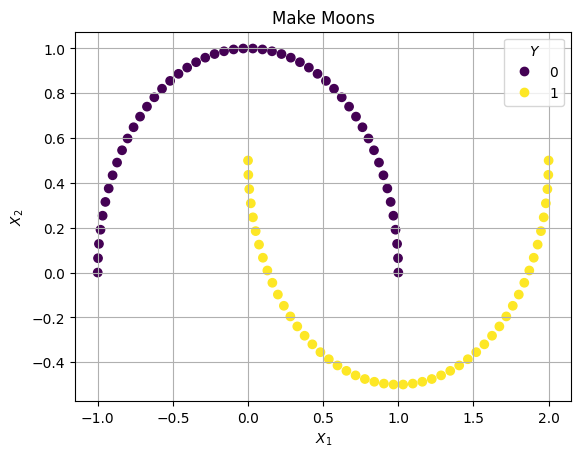

In [3]:
scatter = plt.scatter(X1[:,0], X1[:,1], c=y1, cmap='viridis')
plt.title("Make Moons")
plt.legend(*scatter.legend_elements(), title="$Y$")
plt.xlabel("$X_1$")
plt.ylabel("$X_2$")
plt.grid(True)

### Split Data

In [4]:
X1_train,X1_test, y1_train, y1_test = train_test_split(
  X1,
  y1,
  test_size=0.4,
  random_state=42
)

### Пошук найкращих параметрів моделей

In [5]:
gaussMixtGS1 = GridSearchCV(
  estimator=GaussianMixture(),
  param_grid={
    "n_components":[2,3],
    "covariance_type": ["full","tied", "diag", "spherical"],
    "n_init": [2]
    },
  scoring=[ "v_measure_score"],
  refit="v_measure_score",
  cv=3,
  verbose=1,
  error_score="raise",
)

bayesGaussMixtGS1 = GridSearchCV(
  estimator=BayesianGaussianMixture(),
  param_grid={
    "n_components":[2,3],
    "covariance_type": ["full","tied", "diag", "spherical"],
    "n_init": [2]
    },
  scoring=[ "v_measure_score"],
  refit="v_measure_score",
  cv=3,
  verbose=1,
  error_score="raise",
)

In [6]:
%%time
_ = gaussMixtGS1.fit(
  X1_train,
  y1_train
)

Fitting 3 folds for each of 8 candidates, totalling 24 fits
CPU times: user 1.55 s, sys: 14.7 ms, total: 1.57 s
Wall time: 2.01 s


In [7]:
%%time
_ = bayesGaussMixtGS1.fit(
  X1_train,
  y1_train
)

Fitting 3 folds for each of 8 candidates, totalling 24 fits
CPU times: user 2.56 s, sys: 14.6 ms, total: 2.58 s
Wall time: 3.01 s


In [8]:
print(gaussMixtGS1.best_params_)
print("v-measure:",gaussMixtGS1.best_score_)

{'covariance_type': 'tied', 'n_components': 3, 'n_init': 2}
v-measure: 0.5196947822248797


In [9]:
print(bayesGaussMixtGS1.best_params_)
print("v-measure:",bayesGaussMixtGS1.best_score_)

{'covariance_type': 'full', 'n_components': 3, 'n_init': 2}
v-measure: 0.44038818041953665


### Метрики якості

In [10]:
y_pred_gaussMixt1 = gaussMixtGS1.best_estimator_.predict(X1_test)
y_pred_bayesGaussMixt1 = bayesGaussMixtGS1.best_estimator_.predict(X1_test)

Для `GaussianMixture`.

In [11]:
homogeneity, completeness, v_measure = homogeneity_completeness_v_measure(
  y1_test,
  y_pred_gaussMixt1,
)

print(f"Homogeneity: {homogeneity}")
print(f"Completeness: {completeness}")
print(f"V-measure: {v_measure}")

Homogeneity: 0.36183188069362765
Completeness: 0.22840774736033997
V-measure: 0.2800394987536494


Для `BayesianGaussianMixture`.

In [12]:
homogeneity, completeness, v_measure = homogeneity_completeness_v_measure(
  y1_test,
  y_pred_bayesGaussMixt1,
)

print(f"Homogeneity: {homogeneity}")
print(f"Completeness: {completeness}")
print(f"V-measure: {v_measure}")

Homogeneity: 0.2772194815592689
Completeness: 0.2772194815592689
V-measure: 0.2772194815592689


Cпрогнозовані значення моделлю `GaussianMixture`.

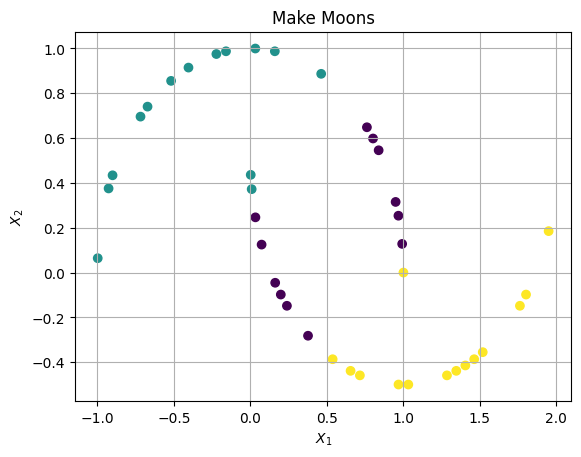

In [13]:
plt.scatter(X1_test[:, 0],X1_test[:, 1],c=y_pred_gaussMixt1,cmap='viridis')
plt.title("Make Moons")
plt.xlabel("$X_1$")
plt.ylabel("$X_2$")
plt.grid(True)

Cпрогнозовані значення моделлю `BayesianGaussianMixture`:

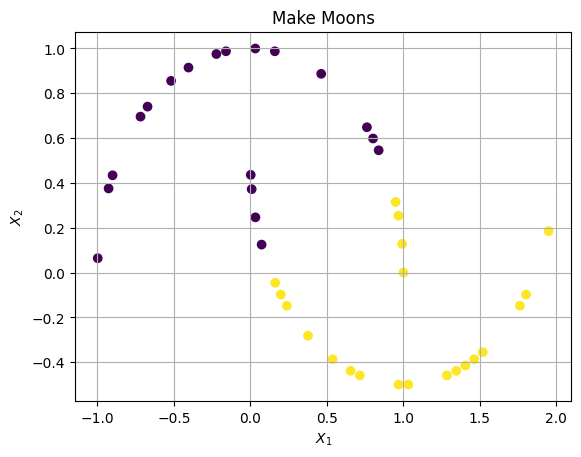

In [14]:
plt.scatter(X1_test[:, 0],X1_test[:, 1],c=y_pred_bayesGaussMixt1,cmap='viridis')
plt.title("Make Moons")
plt.xlabel("$X_1$")
plt.ylabel("$X_2$")
plt.grid(True)

Результати очікувані, як і описано [тут](https://scikit-learn.org/dev/auto_examples/cluster/plot_cluster_comparison.html#sphx-glr-auto-examples-cluster-plot-cluster-comparison-py). Обидві моделі погано справляються з кластеризацією через складність зв'язків у наборі даних.

## Найкращі моделі для набору (b)

###  EDA

In [15]:
np.random.seed(0)
n_points_per_cluster = 10000
C1 = [-6, -2] + 0.7 * np.random.randn(n_points_per_cluster, 2)
C2 = [-2, 2] + 0.3 * np.random.randn(n_points_per_cluster, 2)
C3 = [1, -2] + 0.2 * np.random.randn(n_points_per_cluster, 2)
C4 = [4, -4] + 0.1 * np.random.randn(n_points_per_cluster, 2)
C5 = [5, 0] + 1.4 * np.random.randn(n_points_per_cluster, 2)
C6 = [5, 6] + 2.0 * np.random.randn(n_points_per_cluster, 2)
X2 = np.vstack((C1, C2, C3, C4, C5, C6))

l1 = np.array([1 for i in range(10000)])
l2 = np.array([2 for i in range(10000)])
l3 = np.array([3 for i in range(10000)])
l4 = np.array([4 for i in range(10000)])
l5 = np.array([5 for i in range(10000)])
l6 = np.array([6 for i in range(10000)])

y2 = np.hstack((l1, l2, l3, l4, l5, l6))

In [16]:
print(f"X2 shape: {X2.shape}")
print(f"y2 shape: {y2.shape}")

X2 shape: (60000, 2)
y2 shape: (60000,)


### Split Data

In [17]:
X2_train,X2_test, y2_train, y2_test = train_test_split(
  X2,
  y2,
  test_size=0.1,
  random_state=42
)

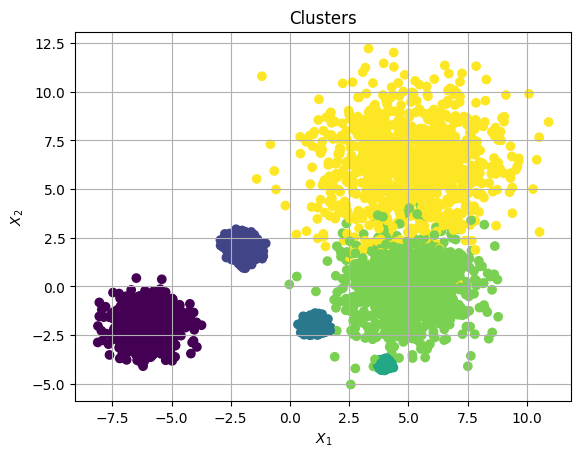

In [18]:
plt.scatter(X2_test[:, 0],X2_test[:, 1],c=y2_test,cmap='viridis')
plt.title("Clusters")
plt.xlabel("$X_1$")
plt.ylabel("$X_2$")
plt.grid(True)

### Пошук найкращих параметрів моделей

In [19]:
gaussMixtGS2 = GridSearchCV(
  estimator=GaussianMixture(),
  param_grid={
    "n_components":[5,6],
    "covariance_type": ["full","tied", "diag", "spherical"],
    "n_init": [2]
    },
  scoring=[ "v_measure_score"],
  refit="v_measure_score",
  cv=3,
  verbose=1,
  error_score="raise",
  n_jobs=2
)

bayesGaussMixtGS2 = GridSearchCV(
  estimator=BayesianGaussianMixture(),
  param_grid={
    "n_components": [5,6],
    "covariance_type": ["full","tied", "diag", "spherical"],
    "n_init": [2]
    },
  scoring=[ "v_measure_score"],
  refit="v_measure_score",
  cv=3,
  verbose=1,
  error_score="raise",
  n_jobs=2
)

In [20]:
%%time
_ = gaussMixtGS2.fit(
  X2_train,
  y2_train
)

Fitting 3 folds for each of 8 candidates, totalling 24 fits
CPU times: user 828 ms, sys: 710 ms, total: 1.54 s
Wall time: 23.1 s


In [21]:
%%time
_ = bayesGaussMixtGS2.fit(
  X2_train,
  y2_train
)

Fitting 3 folds for each of 8 candidates, totalling 24 fits
CPU times: user 2.28 s, sys: 1.52 s, total: 3.8 s
Wall time: 32.1 s


In [22]:
print(gaussMixtGS2.best_params_)
print("v-measure:",gaussMixtGS2.best_score_)

{'covariance_type': 'diag', 'n_components': 6, 'n_init': 2}
v-measure: 0.967978638050814


In [23]:
print(bayesGaussMixtGS2.best_params_)
print("v-measure:",bayesGaussMixtGS2.best_score_)

{'covariance_type': 'spherical', 'n_components': 6, 'n_init': 2}
v-measure: 0.9677254979607114


### Метрики якості

In [24]:
y_pred_gaussMixt2 = gaussMixtGS2.best_estimator_.predict(X2_test)
y_pred_bayesGaussMixt2 = bayesGaussMixtGS2.best_estimator_.predict(X2_test)

In [25]:
homogeneity, completeness, v_measure = homogeneity_completeness_v_measure(
  y2_test,
  y_pred_gaussMixt2,
)

print(f"Homogeneity: {homogeneity}")
print(f"Completeness: {completeness}")
print(f"V-measure: {v_measure}")

Homogeneity: 0.9719804329925744
Completeness: 0.9721384907959527
V-measure: 0.9720594554691759


In [26]:
homogeneity, completeness, v_measure = homogeneity_completeness_v_measure(
  y2_test,
  y_pred_bayesGaussMixt2,
)

print(f"Homogeneity: {homogeneity}")
print(f"Completeness: {completeness}")
print(f"V-measure: {v_measure}")

Homogeneity: 0.971381982845866
Completeness: 0.9714588456034348
V-measure: 0.9714204127042264


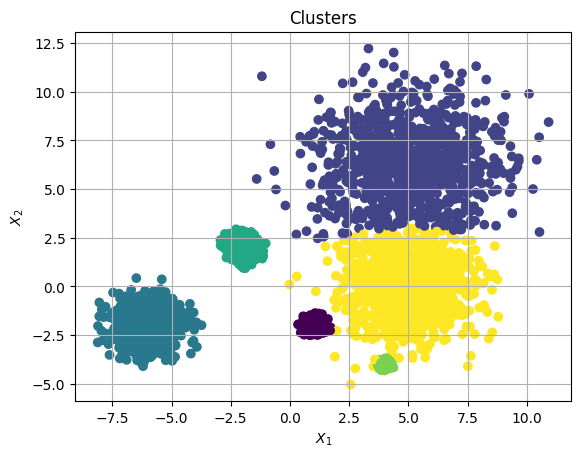

In [27]:
plt.scatter(X2_test[:, 0],X2_test[:, 1],c=y_pred_gaussMixt2,cmap='viridis')
plt.title("Clusters")
plt.xlabel("$X_1$")
plt.ylabel("$X_2$")
plt.grid(True)

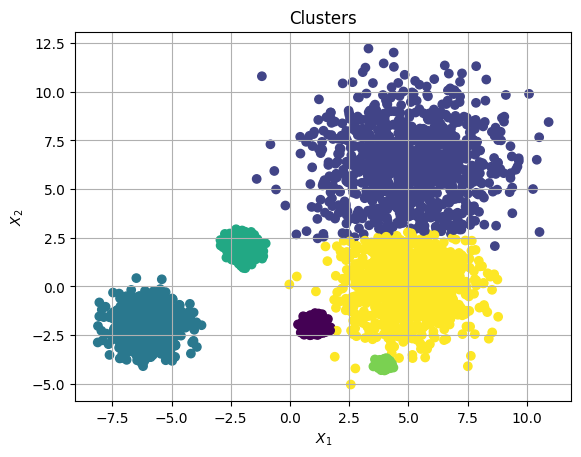

In [28]:
plt.scatter(X2_test[:, 0],X2_test[:, 1],c=y_pred_bayesGaussMixt2,cmap='viridis')
plt.title("Clusters")
plt.xlabel("$X_1$")
plt.ylabel("$X_2$")
plt.grid(True)

В даному випадку, обидві моделі гарно справилися зі своїм завданням, адже структура набору даних більш проста на відміну від минулого набору. Проте, швидкість навчання моделей дуже велика, особливо для `BayesianGaussianMixture`. Це пов'язано з тим, що використовується більш складний алгоритм оцінювання - варіаційний висновок.

## Висновки

Обидві моделі (`GaussianMixture` та `BayesianGaussianMixture`) не справилися з кластеризацією даних з набору `make_moons`, проте з більш простим набором даних але за розмірами більше за перший набір, досить добре справилися, про що кажуть метрики якості оцінки моделей. Головний недолік моделей - швидкість навчання, на яку напряму впливає розмір навчальної вибірки.